# Asset Efficient Frontier Analysis

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import Risk_Kit as rk

### Loading and Cleaning Industries returns Dataset

In [3]:
ind=pd.read_csv("ind30_m_vw_rets.csv",header=0,index_col=0,parse_dates=True)
ind.head()

C:\Users\chris\AppData\Local\Temp\ipykernel_9264\2817505677.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ind=pd.read_csv("ind30_m_vw_rets.csv",header=0,index_col=0,parse_dates=True)


,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
192607,0.5600,-5.1900,1.2900,2.9300,10.9700,-0.4800,8.0800,1.7700,8.1400,0.3900,...,0.8300,9.2200,2.0600,7.7000,1.9300,-23.7900,0.0700,1.8700,0.3700,5.2000
192608,2.5900,27.0300,6.5000,0.5500,10.0100,-3.5800,-2.5100,4.2500,5.5000,8.1400,...,2.1700,2.0200,4.3900,-2.3800,4.8800,5.3900,-0.7500,-0.1300,4.4600,6.7600
192609,1.1600,4.0200,1.2600,6.5800,-0.9900,0.7300,-0.5100,0.6900,5.3300,2.3100,...,2.4100,2.2500,0.1900,-5.5400,0.0500,-7.8700,0.2500,-0.5600,-1.2300,-3.8600
192610,-3.0600,-3.3100,1.0600,-4.7600,9.4700,-4.6800,0.1200,-0.5700,-4.7600,1.0000,...,-0.1100,-2.0000,-1.0900,-5.0800,-2.6400,-15.3800,-2.2000,-4.1100,-5.1600,-8.4900
192611,6.3500,7.2900,4.5500,1.6600,-5.8000,-0.5400,1.8700,5.4200,5.2000,3.1100,...,1.6300,3.7700,3.6400,3.8400,1.6000,4.6700,6.5200,4.3300,2.2400,4.0000


In [4]:
ind.index=pd.to_datetime(ind.index,format="%Y%m").to_period("M")

In [5]:
ind.columns

Index(['Food ', 'Beer ', 'Smoke', 'Games', 'Books', 'Hshld', 'Clths', 'Hlth ',
       'Chems', 'Txtls', 'Cnstr', 'Steel', 'FabPr', 'ElcEq', 'Autos', 'Carry',
       'Mines', 'Coal ', 'Oil  ', 'Util ', 'Telcm', 'Servs', 'BusEq', 'Paper',
       'Trans', 'Whlsl', 'Rtail', 'Meals', 'Fin  ', 'Other'],
      dtype='object')

In [6]:
ind.columns=ind.columns.str.strip()

In [7]:
ind.columns

Index(['Food', 'Beer', 'Smoke', 'Games', 'Books', 'Hshld', 'Clths', 'Hlth',
       'Chems', 'Txtls', 'Cnstr', 'Steel', 'FabPr', 'ElcEq', 'Autos', 'Carry',
       'Mines', 'Coal', 'Oil', 'Util', 'Telcm', 'Servs', 'BusEq', 'Paper',
       'Trans', 'Whlsl', 'Rtail', 'Meals', 'Fin', 'Other'],
      dtype='object')

In [8]:
ind=ind/100

In [9]:
ind.head()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-07,0.0056,-0.0519,0.0129,0.0293,0.1097,-0.0048,0.0808,0.0177,0.0814,0.0039,...,0.0083,0.0922,0.0206,0.0770,0.0193,-0.2379,0.0007,0.0187,0.0037,0.0520
1926-08,0.0259,0.2703,0.0650,0.0055,0.1001,-0.0358,-0.0251,0.0425,0.0550,0.0814,...,0.0217,0.0202,0.0439,-0.0238,0.0488,0.0539,-0.0075,-0.0013,0.0446,0.0676
1926-09,0.0116,0.0402,0.0126,0.0658,-0.0099,0.0073,-0.0051,0.0069,0.0533,0.0231,...,0.0241,0.0225,0.0019,-0.0554,0.0005,-0.0787,0.0025,-0.0056,-0.0123,-0.0386
1926-10,-0.0306,-0.0331,0.0106,-0.0476,0.0947,-0.0468,0.0012,-0.0057,-0.0476,0.0100,...,-0.0011,-0.0200,-0.0109,-0.0508,-0.0264,-0.1538,-0.0220,-0.0411,-0.0516,-0.0849
1926-11,0.0635,0.0729,0.0455,0.0166,-0.0580,-0.0054,0.0187,0.0542,0.0520,0.0311,...,0.0163,0.0377,0.0364,0.0384,0.0160,0.0467,0.0652,0.0433,0.0224,0.0400


## Starting with basic risk and statistical measures

### Annualized returns of different industries 1995-2000

<Axes: >

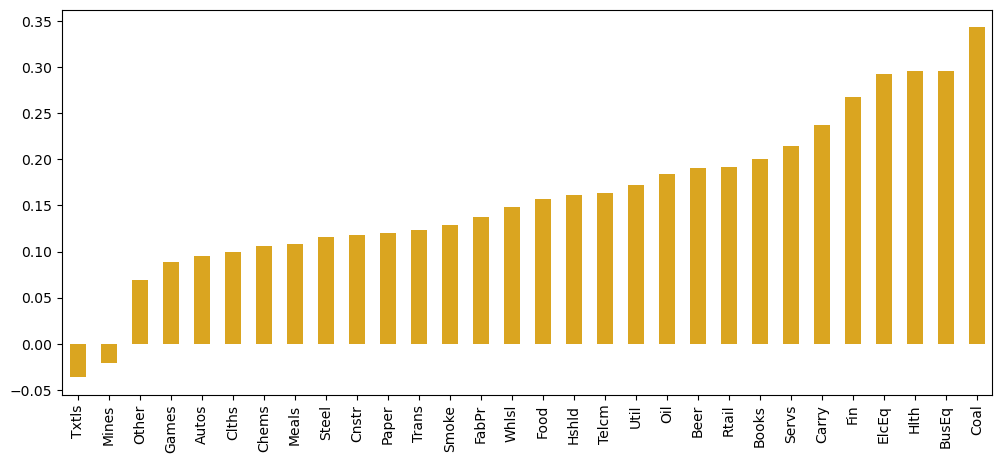

In [10]:
rk.annual_returns(ind["1995":"2000"],12).sort_values().plot.bar(figsize=(12,5),color="goldenrod")

### Industry Sharpe Ratio in period 2000-2018

<Axes: >

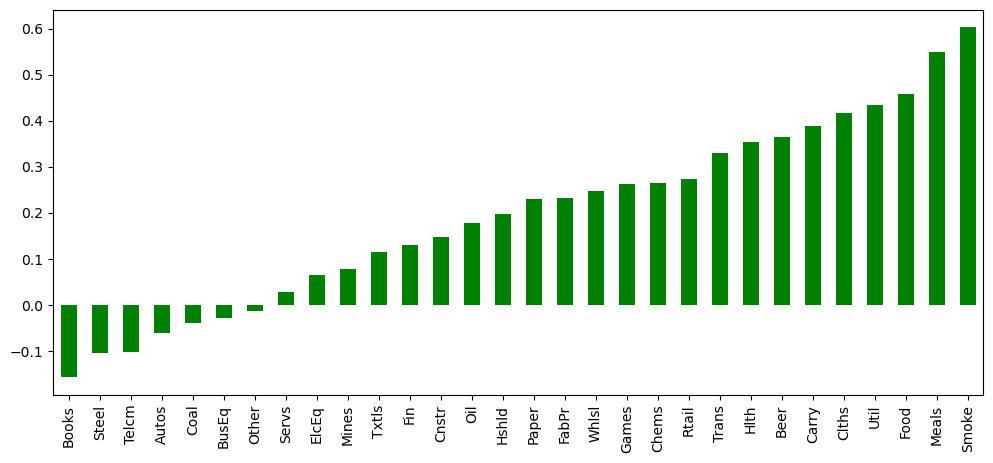

In [11]:
rk.sharpe_ratio(ind["2000":"2018"])["Sharpe Ratio"].sort_values().plot.bar(figsize=(12,5),color="green")

### Drawdowns in food industry over entire period

<Axes: >

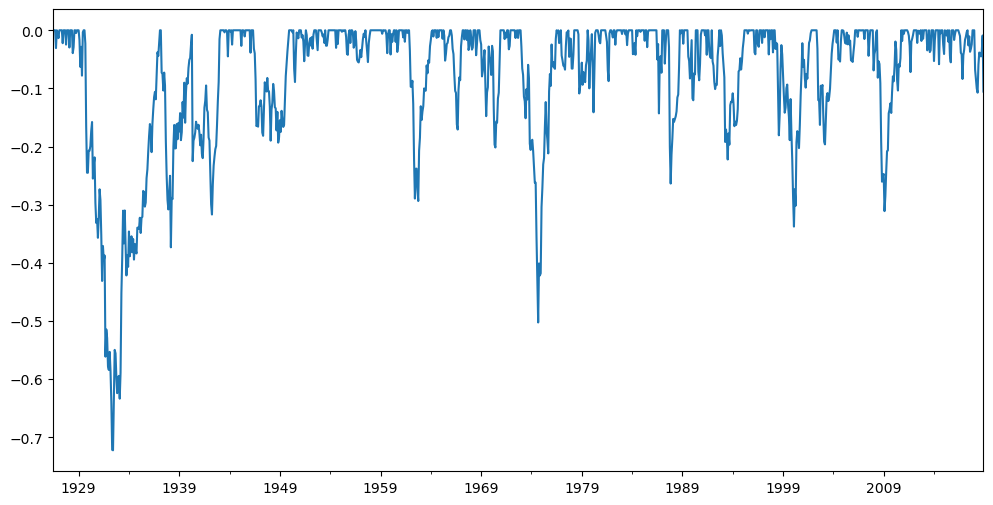

In [12]:
rk.drawdowns(ind["Food"])["Drawdown"].plot.line(figsize=(12,6))

### VaR with gaussian assumption and cornish-fisher adjustment

<Axes: >

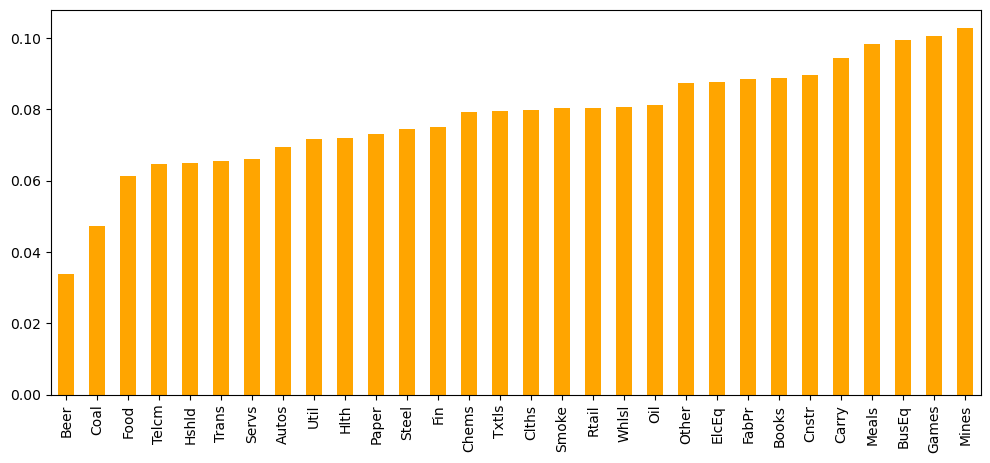

In [13]:
rk.var_assumption(ind,modified=True).sort_values().plot.bar(figsize=(12,5),color="orange")

# Portfolio allocation curve along returns volatility tradeoff using historical returns as expected returns

### 2 Assets Portfolio

In [14]:
er=rk.annual_returns(ind["1991":])

In [15]:
cov_mat=ind["1991":].cov()

In [16]:
l=["Fin","Rtail"]

<Axes: xlabel='Portfolio Volatility', ylabel='Portfolio Returns'>

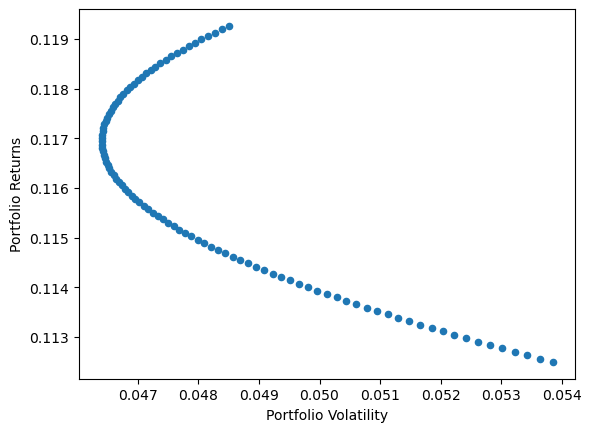

In [17]:
rk.portfolio_curve(er[l],cov_mat.loc[l,l])

# Plotting Efficient frontier for any number of assets

In [18]:
#ls=["Smoke","Fin","Games","Coal"]
ls=["Fin","Rtail","Autos","Oil"]

In [19]:
er=rk.annual_returns(ind["1991":])

In [20]:
cov_mx=ind["1991":].cov()

<Axes: xlabel='Volatility', ylabel='Returns'>

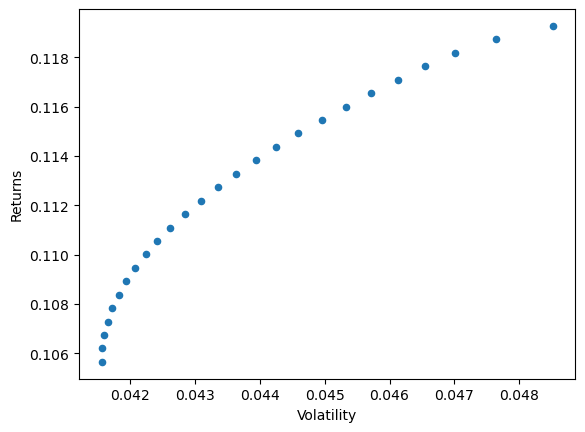

In [21]:
rk.efficient_frontier(er[ls],cov_mx.loc[ls,ls],100)

In [22]:
df=rk.efficient_frontier(er[ls],cov_mx.loc[ls,ls],100,False)

In [23]:
df["Volatility"].idxmin()

74

In [24]:
df[df["Returns"]>=df["Returns"][df["Volatility"].idxmin()]]

,Weight Alloc,Returns,Volatility
74,"[0.07, 0.54, 0.0, 0.39]",0.1057,0.0416
75,"[0.08, 0.55, 0.0, 0.37]",0.1062,0.0416
76,"[0.08, 0.56, 0.0, 0.36]",0.1067,0.0416
77,"[0.08, 0.58, 0.0, 0.34]",0.1073,0.0417
78,"[0.09, 0.59, 0.0, 0.32]",0.1078,0.0417
79,"[0.1, 0.6, 0.0, 0.31]",0.1084,0.0418
80,"[0.1, 0.61, 0.0, 0.29]",0.1089,0.0419
81,"[0.11, 0.62, 0.0, 0.27]",0.1095,0.0421
82,"[0.11, 0.64, 0.0, 0.25]",0.1100,0.0422
83,"[0.12, 0.65, 0.0, 0.24]",0.1106,0.0424


In [25]:
df["Returns"][df["Volatility"].idxmin()]

0.10565360626435816